In [1]:
import pandas as pd
import numpy as np

C:\Users\nicho\AppData\Local\Temp\ipykernel_8800\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
embeddings=pd.read_csv('pure_embeddings.csv').set_index('news_id')
news = pd.read_csv('MIND_small/csv/news_big_embeddings.csv').drop(columns=['Unnamed: 0', 'abstract_entities', 'title_entities', 'url'])
news = news[news['abstract_embeddings'] != '[0]']
news = news[news['abstract_embeddings'].isna() == False].set_index('news_id')
news.drop(columns = ['abstract_embeddings', 'title_embeddings'], inplace=True)
# news = pd.read_csv('MIND_small/csv/news.csv').drop(columns=['title', 'abstract','url','title_entities','abstract_entities']).set_index('news_id')

In [3]:
total = pd.concat([news, embeddings], axis=1)
total.head()

,Unnamed: 0.1,category,sub_category,title,abstract,0_abstract,1_abstract,2_abstract,3_abstract,4_abstract,...,758_title,759_title,760_title,761_title,762_title,763_title,764_title,765_title,766_title,767_title
news_id,,,,,,,,,,,,,,,,,,,,,
N55528,0,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",-0.678508,0.510086,0.999818,-0.989043,0.946416,...,0.784108,0.066547,0.084478,-0.474509,-0.233880,-0.330869,-0.392143,0.999986,-0.325422,0.990003
N19639,1,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,-0.689825,0.470679,0.999851,-0.994703,0.969886,...,0.923660,-0.199729,0.298200,-0.371616,-0.024119,-0.210733,-0.371494,0.999987,-0.404185,0.982506
N61837,2,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,-0.649138,0.332447,0.999478,-0.975300,0.930517,...,0.756771,-0.275562,0.560876,-0.562148,-0.324376,-0.294702,-0.252834,0.999979,-0.583293,0.985602
N53526,3,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",-0.620251,0.378284,0.999805,-0.993509,0.971419,...,0.788761,-0.043666,0.249670,-0.392529,-0.044873,-0.389453,-0.319429,0.999984,-0.537654,0.991666
N38324,4,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",-0.737245,0.456646,0.999699,-0.987310,0.945211,...,0.712870,-0.060500,0.096479,-0.199158,-0.050173,0.004713,-0.213084,0.999963,-0.298894,0.985555


In [4]:
total[total.isna().any(axis=1)]

,Unnamed: 0.1,category,sub_category,title,abstract,0_abstract,1_abstract,2_abstract,3_abstract,4_abstract,...,758_title,759_title,760_title,761_title,762_title,763_title,764_title,765_title,766_title,767_title
news_id,,,,,,,,,,,,,,,,,,,,,


In [5]:
total.drop(columns=['Unnamed: 0.1', 'title', 'abstract'], inplace=True)

In [6]:
total.dtypes

category         object
sub_category     object
0_abstract      float64
1_abstract      float64
2_abstract      float64
                 ...   
763_title       float64
764_title       float64
765_title       float64
766_title       float64
767_title       float64
Length: 1538, dtype: object

In [7]:
# embeddings[[str(i) + '_abstract' for i in range(0, 700)]]
subset = total[['category','sub_category'] + [str(i) + '_abstract' for i in range(0, 10)]]
subset.head()

,category,sub_category,0_abstract,1_abstract,2_abstract,3_abstract,4_abstract,5_abstract,6_abstract,7_abstract,8_abstract,9_abstract
news_id,,,,,,,,,,,,
N55528,lifestyle,lifestyleroyals,-0.678508,0.510086,0.999818,-0.989043,0.946416,0.872465,0.983302,-0.989201,-0.968395,-0.679993
N19639,health,weightloss,-0.689825,0.470679,0.999851,-0.994703,0.969886,0.945957,0.989684,-0.996318,-0.974794,-0.706272
N61837,news,newsworld,-0.649138,0.332447,0.999478,-0.975300,0.930517,0.928687,0.952428,-0.996233,-0.912072,-0.400712
N53526,health,voices,-0.620251,0.378284,0.999805,-0.993509,0.971419,0.956017,0.990925,-0.997767,-0.974476,-0.661895
N38324,health,medical,-0.737245,0.456646,0.999699,-0.987310,0.945211,0.844170,0.972281,-0.987509,-0.938060,-0.693719


In [8]:
subset[subset.columns[2:]]

,0_abstract,1_abstract,2_abstract,3_abstract,4_abstract,5_abstract,6_abstract,7_abstract,8_abstract,9_abstract
news_id,,,,,,,,,,
N55528,-0.678508,0.510086,0.999818,-0.989043,0.946416,0.872465,0.983302,-0.989201,-0.968395,-0.679993
N19639,-0.689825,0.470679,0.999851,-0.994703,0.969886,0.945957,0.989684,-0.996318,-0.974794,-0.706272
N61837,-0.649138,0.332447,0.999478,-0.975300,0.930517,0.928687,0.952428,-0.996233,-0.912072,-0.400712
N53526,-0.620251,0.378284,0.999805,-0.993509,0.971419,0.956017,0.990925,-0.997767,-0.974476,-0.661895
N38324,-0.737245,0.456646,0.999699,-0.987310,0.945211,0.844170,0.972281,-0.987509,-0.938060,-0.693719
...,...,...,...,...,...,...,...,...,...,...
N17258,-0.618489,0.464543,0.999628,-0.974870,0.929978,0.757753,0.966552,-0.970493,-0.933629,-0.651518
N23858,-0.632591,0.450974,0.999812,-0.988964,0.946670,0.778630,0.980280,-0.977038,-0.968778,-0.662544
N16909,-0.792380,0.611406,0.999981,-0.994471,0.969889,0.769428,0.988007,-0.911938,-0.988090,-0.712895


In [9]:
subset[subset.isna().any(axis=1)]

,category,sub_category,0_abstract,1_abstract,2_abstract,3_abstract,4_abstract,5_abstract,6_abstract,7_abstract,8_abstract,9_abstract
news_id,,,,,,,,,,,,


In [10]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap.umap_ as umap

import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score 

c:\Users\nicho\anaconda3\envs\recommenderEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
import umap.plot as uplot

In [12]:
embedding_mapper = umap.UMAP(random_state=42).fit(total[total.columns.to_list()[2:]])

c:\Users\nicho\anaconda3\envs\recommenderEnv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [13]:
umap_data = total

<Axes: >

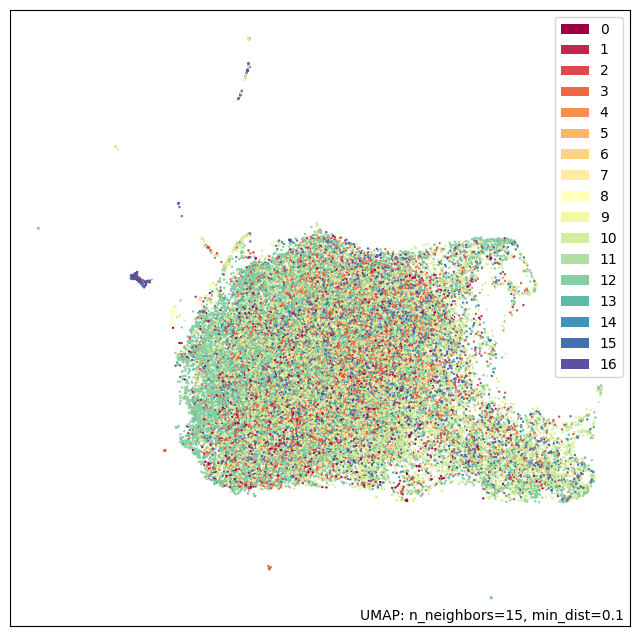

In [16]:
label_encoder = LabelEncoder()
umap_data['category'] = label_encoder.fit_transform(umap_data['category'])
umap_data['sub_category'] = label_encoder.fit_transform(umap_data['sub_category'])
uplot.points(embedding_mapper, labels=umap_data['category'], cmap='viridis')